In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
# from test.py import best_fit_distribution,  make_pdf


In [ ]:
df1 = pd.read_csv('Processed.csv')

In [ ]:
df1.describe()

,Number of reviews,Number of ratings,Average rating,Series,Awards,minmax_norm_ratings,mean_norm_ratings
count,1000.00000,1.000000e+03,1000.000000,1000.000000,427.00000,1000.000000,1000.000000
mean,5052.40400,1.078779e+05,3.942720,0.571000,3.75644,6.828160,1.008160
std,13405.66741,4.510871e+05,0.303521,0.495181,4.44335,0.910562,0.910562
min,0.00000,4.000000e+00,2.000000,0.000000,1.00000,1.000000,-4.820000
25%,109.75000,8.025000e+02,3.760000,0.000000,1.00000,6.280000,0.460000
50%,885.00000,1.048400e+04,3.940000,1.000000,2.00000,6.820000,1.000000
75%,3996.00000,5.342250e+04,4.130000,1.000000,5.00000,7.390000,1.570000
max,173693.00000,7.278478e+06,5.000000,1.000000,41.00000,10.000000,4.180000


In [ ]:
df1.columns

Index(['URL', 'Title', 'Author', 'Number of reviews', 'Number of ratings',
       'Average rating', 'Pages', 'Publish year', 'Series', 'Genres', 'Awards',
       'Places', 'minmax_norm_ratings', 'mean_norm_ratings'],
      dtype='object')

In [ ]:
# df1['Awards'] = df1['Awards'].astype(str)
# counts= df1['Awards'].apply(lambda x: x.split(','))
# # counts.replace(np.nan,'')
# aw_count = counts.apply(lambda x: len(x))
# df1['Awards_count'] = aw_count

df1['Awards'] = df1['Awards'].replace(np.nan, 0.0)
df1['Awards']

0      41.0
1       2.0
2      22.0
3      20.0
4       0.0
       ... 
995     1.0
996     0.0
997     0.0
998     0.0
999     0.0
Name: Awards, Length: 1000, dtype: float64

In [ ]:
Scaler = MinMaxScaler((1,10))
df1['minmax_norm_rating'] = Scaler.fit_transform(df1[['Average rating']])
df1['minmax_norm_rating1'] = 1 + (df1['Average rating']-df1['Average rating'].min()/df1['Average rating'].max()-df1['Average rating'].min())*9
df1['meannorm_rating'] = 1 + ((df1['Average rating'] - df1['Average rating'].mean())/(df1['Average rating'].max() - df1['Average rating'].min()))*9

In [ ]:
bygroup_minmax_df1 = pd.DataFrame(data=df1.groupby('Publish year')['minmax_norm_rating'].agg('mean'))

### Exercise 1
Create a 2D scatterplot with pages on the x-axis and num_ratings on the y-axis.


<AxesSubplot:xlabel='Pages', ylabel='Number of reviews'>

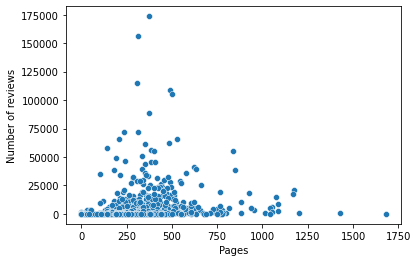

In [ ]:
"""Exercise 1"""
df1['Pages'] = df1['Pages'].apply(lambda x: x.replace("not known", "0"))
df1['Pages'] = df1["Pages"].astype(int)
sns.scatterplot(x = df1['Pages'], y = df1['Number of reviews'], )

### Exercise 2
Can you compute numerically the correlation coefficient of these two columns?

In [ ]:
"""Exercise 2""" 

'Exercise 2'

### Exercise 3
Visualise the avg_rating distribution.

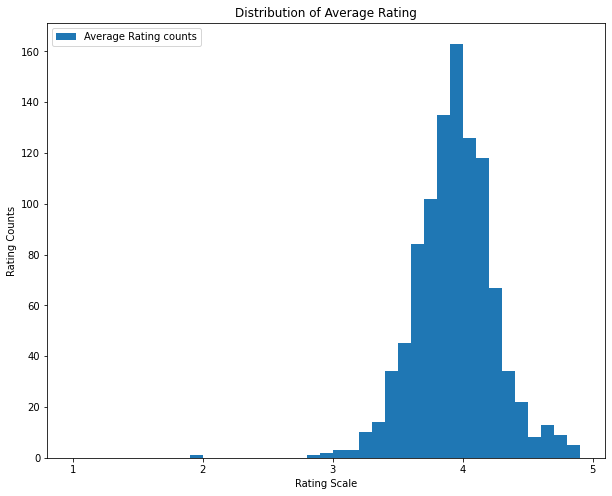

In [ ]:
"""Exercise 3"""
ratings = list(range(1,6))
plt.figure(figsize=(10,8))
plt.hist(df1['Average rating'], bins=np.arange(1,5,0.1), label = 'Average Rating counts')
plt.xlabel('Rating Scale')
plt.ylabel('Rating Counts')
plt.legend(loc='upper left')
plt.xticks(ratings)
plt.title('Distribution of Average Rating')
plt.show()

### Exercise 4
Visualise the minmax_norm_rating distribution.

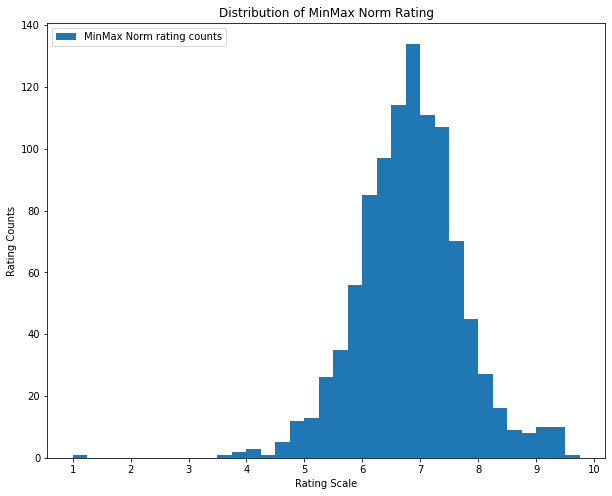

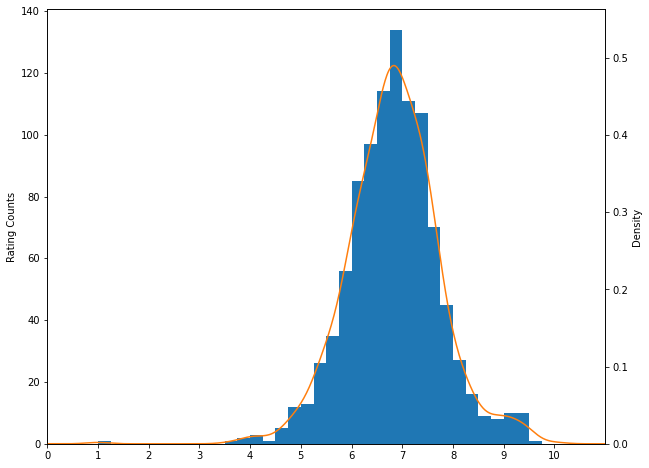

In [ ]:
"""Exercise 4"""
ratings = list(range(1,11))
plt.figure(figsize=(10,8))
plt.hist(df1['minmax_norm_rating'], bins=np.arange(1,10,0.25), label = 'MinMax Norm rating counts')
plt.plot()
plt.xlabel('Rating Scale')
plt.ylabel('Rating Counts')
plt.legend(loc='upper left')
plt.xticks(ratings)
plt.title('Distribution of MinMax Norm Rating')
plt.show()



#I have created somewhat nicer looking graph I think
data = pd.read_csv('Processed.csv')
minmax = data['minmax_norm_ratings']
fig,ax = plt.subplots(figsize=(10,8))
ax.hist(minmax, bins=np.arange(1,10,0.25))
ax.set_ylabel('Rating Counts')
a1 = ax.twinx()
a1.hist(minmax, bins=np.arange(1,10,0.25), density=True)
minmax.plot(kind='kde')
ax.set_xlim(0,11)
ax.set_xticks(np.arange(0,11))
plt.show()

## That looks good!! 
## We can even plot better looking graph with seaborn

### Exercise 5
Visualise the mean_norm_rating distribution.

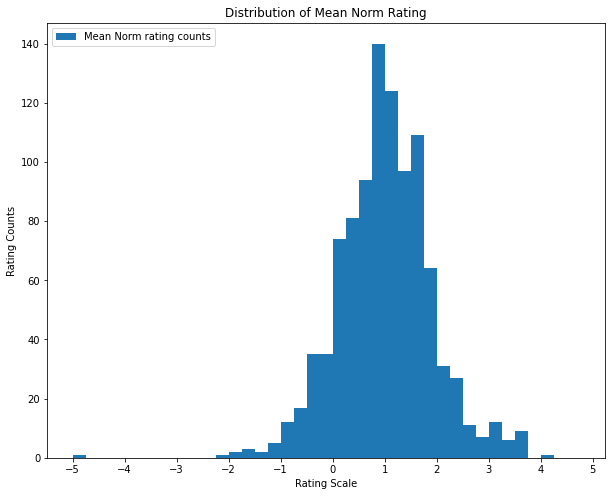

In [ ]:
"""Exercise 5"""
# ratings = [ 0.7, 1, 1.3]
plt.figure(figsize=(10,8))
plt.hist(df1['meannorm_rating'], bins=np.arange(-5,5,0.25), label = 'Mean Norm rating counts')
plt.xlabel('Rating Scale')
plt.xticks(np.arange(-5,6))
plt.ylabel('Rating Counts')
plt.legend(loc='upper left')
# plt.xticks(df1['meannorm_rating'])
plt.title('Distribution of Mean Norm Rating')
plt.show()


#I have created somewhat nicer looking graph I think
data = pd.read_csv('Processed.csv')
minmax = data['minmax_norm_ratings']
fig,ax = plt.subplots(figsize=(10,8))
ax.hist(minmax, bins=np.arange(-5,5,0.25))
ax.set_ylabel('Rating Counts')
a1 = ax.twinx()
a1.hist(minmax, bins=np.arange(1,10,0.25), density=True)
minmax.plot(kind='kde')
ax.set_xlim(0,11)
ax.set_xticks(np.arange(0,11))
plt.show()

### Exercise 6
Create one graph that represents in the same figure both minmax_norm_rating and mean_norm_rating distributions.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          2.,   3.,   1.,   5.,  12.,  13.,  26.,  35.,  56.,  85.,  97.,
        114., 134., 111., 107.,  70.,  45.,  27.,  16.,   9.,   8.,  10.,
         10.,   1.]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25,
        6.5 , 6.75, 7.  , 7.25, 7.5 , 7.75, 8.  , 8.25, 8.5 , 8.75, 9.  ,
        9.25, 9.5 , 9.75]),
 <BarContainer object of 35 artists>)

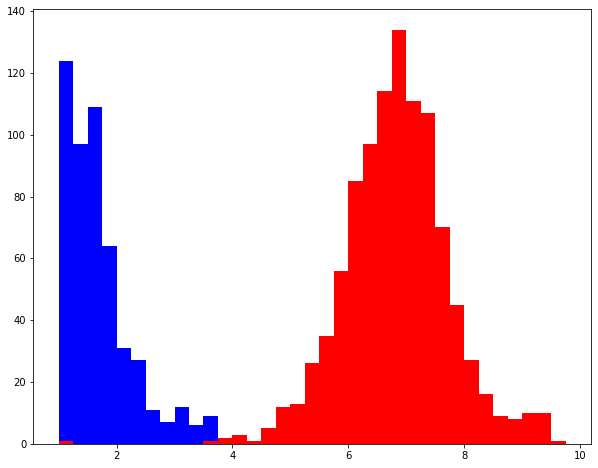

In [ ]:
"""Exercise 6""" # I guess the easiest option is to move mean_norm by 5 to the right so that we don't mess up the distribution
plt.figure(figsize=(10,8))
plt.hist(df1['meannorm_rating'], color= 'b', bins=np.arange(1,10,0.25), label = 'Mean Norm rating counts')
plt.hist(df1['minmax_norm_rating'], color = 'r', bins=np.arange(1,10,0.25), label = 'MinMax Norm rating counts')


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='minmax_norm_rating', ylabel='Density'>

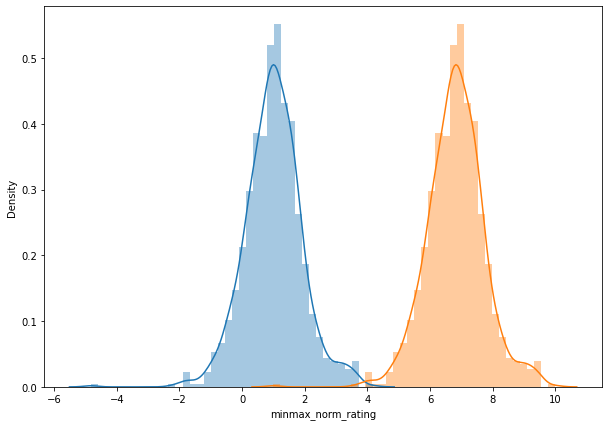

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df1['meannorm_rating'], kde = True, hist = True, rug= False, bins= 40)
sns.distplot(df1['minmax_norm_rating'], kde = True, hist = True, rug= False, bins= 40)

### Exercise 7
What is the best fit in terms of a distribution (normal, chi-squared...) to represent each of those graphs?
* You can use Scipy-Stats Library to figure out the best fitting distribution

In [ ]:
"""Exercise 7"""

'Exercise 7'

### Exercise 8
Visualize the awards distribution in a boxplot and aggregtated bars. Decide which of these representations gives us more information and in which cases they should be used. 

<AxesSubplot:ylabel='Awards'>

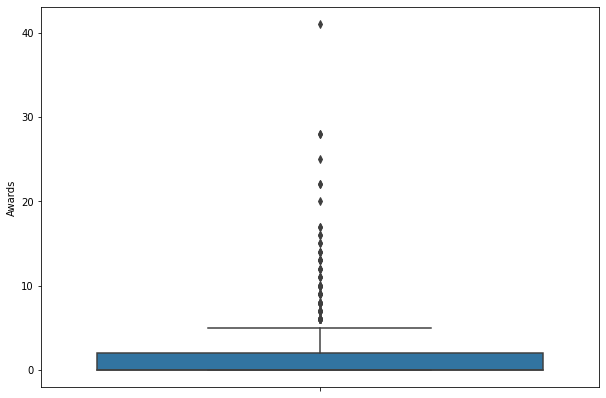

In [ ]:
"""Exercise 8"""
plt.figure(figsize=(10,7))
sns.boxplot(y=df1['Awards'])

### Exercise 9
Yesterday we asked you this:
    * "Group the books by original_publish_year and get the mean of the minmax_norm_ratings of the groups." 
    * Now, make a simple plot to visualise the ratings w.r.t. the years!

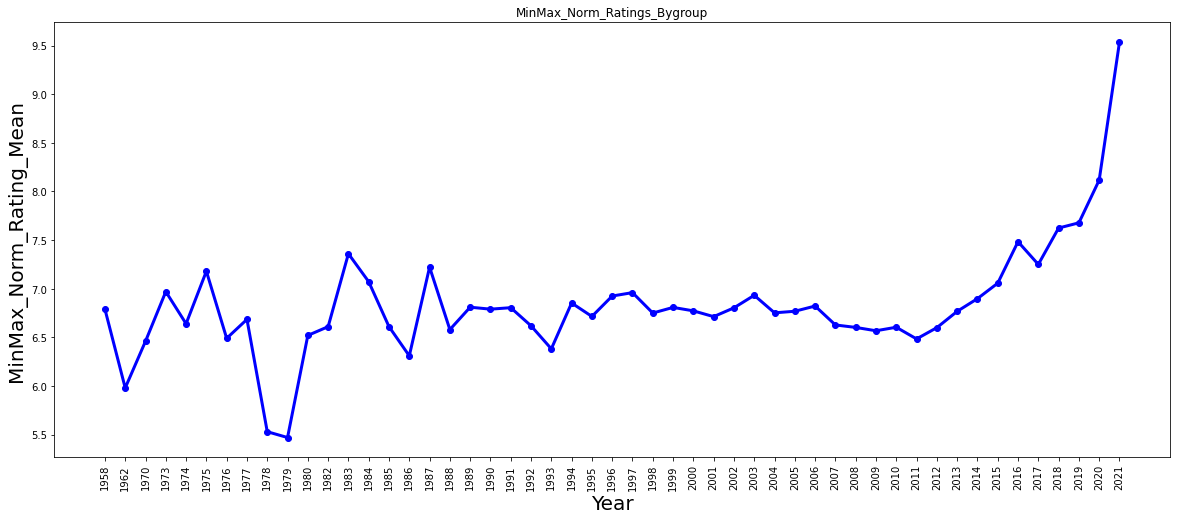

In [ ]:
"""Exercise 9"""
bygroup_minmax_df1.drop(bygroup_minmax_df1.index[-3:], inplace=True)
fig, ax = plt.subplots(1, sharex=True,figsize=(20,8))
ax.plot(bygroup_minmax_df1.index, bygroup_minmax_df1['minmax_norm_rating'], label = 'MinMax_Norm_Ratings', color='b', marker='o', linewidth=3)
ax.set_title('MinMax_Norm_Ratings_Bygroup')


plt.xticks(bygroup_minmax_df1.index,  rotation='vertical')
plt.xlabel('Year', fontsize=20)
plt.ylabel('MinMax_Norm_Rating_Mean', fontsize=20)
plt.show()

### Exercise 10
Make a scatterplot to represent  minmax_norm_ratings in function of the number of awards won by the book.
- Is there another representation that displays this in a more clear manner?
- Optional: Can you plot a best fit linear regression line to represent the relationship?

In [ ]:
"""Exercise 10"""

# sns.lmplot(x="Awards_count", y="minmax_norm_rating", data=df1, hue="Awards_count");

'Exercise 10'

In [1]:
plt.figure(figsize=(10,7))
sns.regplot(x="minmax_norm_rating", y="Awards", data=df1);

NameError: name 'plt' is not defined

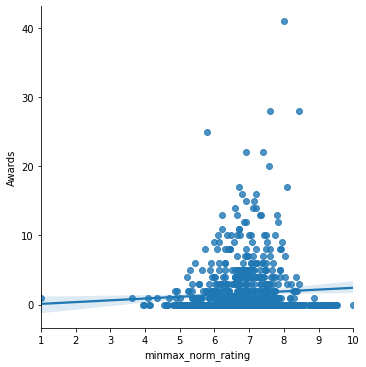

In [ ]:
sns.lmplot(x="minmax_norm_rating", y="Awards", data=df1);